# Plot the carbon isotope discrimination figure 01/07/2025

This script contains code used to make Figure 7: Trend of global stable carbon isotopic discrimination between 1850 and 2014.

In [1]:
#IMPORT NEEDED LIBRARIES
import seaborn as sns
import xarray as xr
import numpy as np
import pandas as pd
import os
from pyrealm import pmodel
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.ticker import MaxNLocator
from collections import OrderedDict

In [2]:
# Load the delta data
tDelta = pd.read_csv('/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/models_ouputs/totalDelta_11models.csv', header = 'infer', index_col = None)
nDelta = pd.read_csv('/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/models_ouputs/delta11Corrected/naturalDelta_11models_Correctedcncm.csv', header = 'infer', index_col = None)
cDelta = pd.read_csv('/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/models_ouputs/delta11Corrected/cropDelta_11models_Correctedcncm.csv', header = 'infer', index_col = None)

In [3]:
# Calculate the change in Total Vegetation Discrimination
dfT = tDelta.copy()
# Subtract the values of the first row from all rows in the last 11 columns
dfT.iloc[:, -14:] = dfT.iloc[:, -14:] - dfT.iloc[0, -14:]

# Mean of 5 rows for the total vegetation
dfT1 = tDelta.groupby(np.arange(len(tDelta))//5).mean()

#Make a variable for time with 5 years interval
years5 = np.arange(1850, 2015, 5)

# Calculate the change in Total Vegetation Discrimination
dfT2 = dfT1.copy()
# Subtract the values of the first row from all rows in the last 11 columns
dfT2.iloc[:, -14:] = dfT2.iloc[:, -14:] - dfT2.iloc[0, -14:]

In [152]:
tDelta.tail(2)

,Unnamed: 0,Years,Keeling_vsCO2,keeling_vstime,ACCESS-ESM1-5,CanESM5,CESM2,CESM2-WACCM,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-ESM2-1,MPI-ESM-1-2-HAM,MPI-ESM-1-2-LR,UKESM1-0-LL,model_mean
163,163,2013,18.565209,18.528,19.138675,18.989182,17.425065,17.321195,18.485085,18.475822,16.939591,17.413623,18.376120,18.625791,17.809293,18.090858
164,164,2014,18.590717,18.550,19.152001,19.009483,17.477350,17.380280,18.497298,18.488552,16.987390,17.482506,18.417184,18.611331,17.863431,18.124255


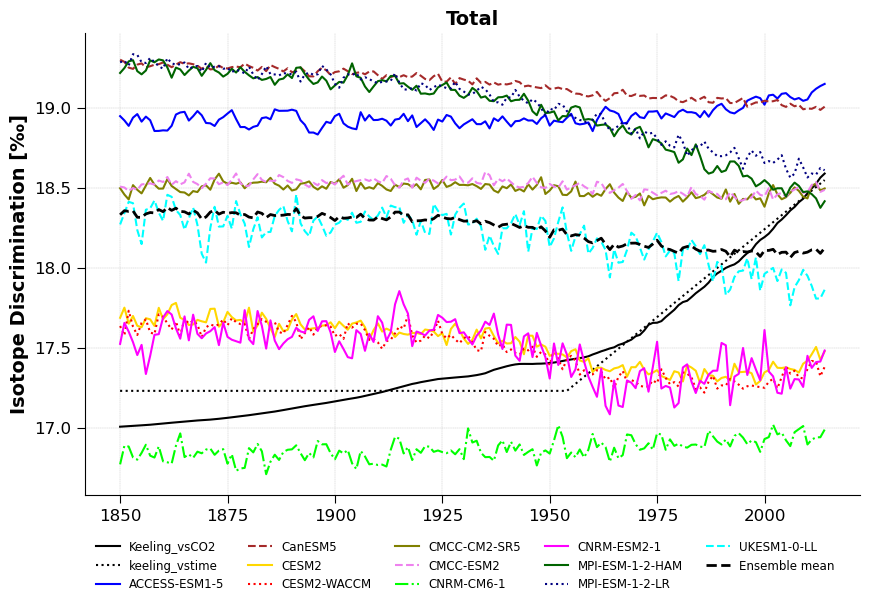

In [4]:
# Plot Total Delta
# Extract columns 2 to 15 (excluding the 'Year' column)
y = tDelta.iloc[:, 2:15]
mean = tDelta['model_mean']
years = tDelta['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Total', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_with_cncm.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


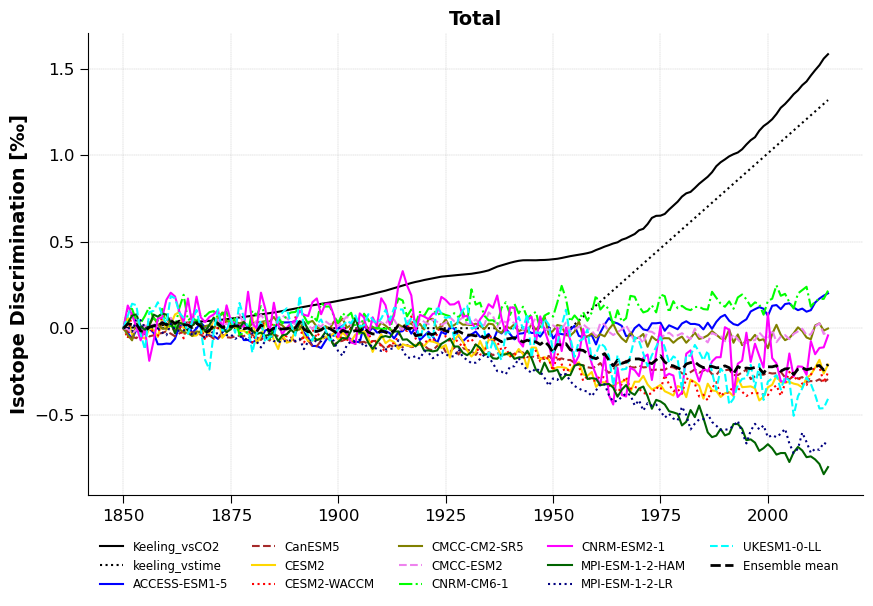

In [5]:
# Plot Total Delta
# Extract columns 2 to 12 (excluding the 'Year' column)
y = dfT.iloc[:, 2:15]
mean = dfT['model_mean']
years = dfT['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Total', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_Change.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


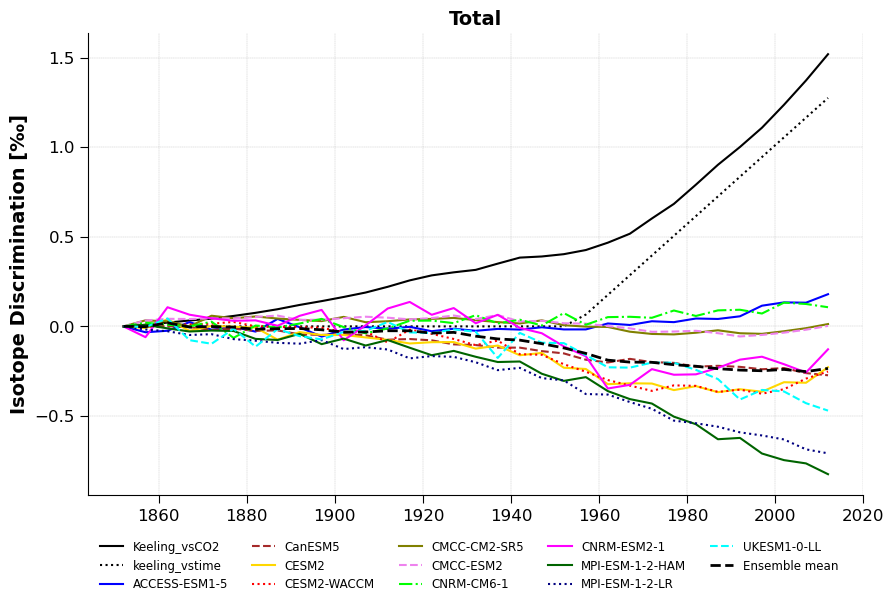

In [6]:
# Plot Total Delta
# Extract columns 2 to 12 (excluding the 'Year' column)
y = dfT2.iloc[:, 2:15]
mean = dfT2['model_mean']
years = dfT2['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Total', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_Change_5yearsMean.png', 
           # dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


# Natural Delta

In [4]:
# Calculate the change in Natural Vegetation Discrimination
dfN = nDelta.copy()
# Subtract the values of the first row from all rows in the last 11 columns
dfN.iloc[:, -14:] = dfN.iloc[:, -14:] - dfN.iloc[0, -14:]

# Mean of 5 rows for the Natural vegetation
dfN1 = nDelta.groupby(np.arange(len(nDelta))//5).mean()

#Make a variable for time with 5 years interval
years5 = np.arange(1850, 2015, 5)

# Calculate the change in Natural Vegetation Discrimination
dfN2 = dfN1.copy()
# Subtract the values of the first row from all rows in the last 11 columns
dfN2.iloc[:, -14:] = dfN2.iloc[:, -14:] - dfN2.iloc[0, -14:]

In [28]:
nDelta.tail(2)

,Unnamed: 0,Years,Keeling_vsCO2,keeling_vstime,ACCESS-ESM1-5,CanESM5,CESM2,CESM2-WACCM,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-ESM2-1,MPI-ESM-1-2-HAM,MPI-ESM-1-2-LR,UKESM1-0-LL,models_mean
163,163,2013,18.565209,18.528,18.898502,19.386289,17.538773,17.431420,18.140559,18.149247,16.961309,17.439034,18.330320,18.463574,18.506570,18.113236
164,164,2014,18.590717,18.550,18.908427,19.421132,17.597452,17.497144,18.164713,18.164957,17.002262,17.520714,18.355777,18.435440,18.563778,18.148345


In [30]:
17-18.15

-1.1499999999999986

In [31]:
19.421132-18.15

1.2711320000000015

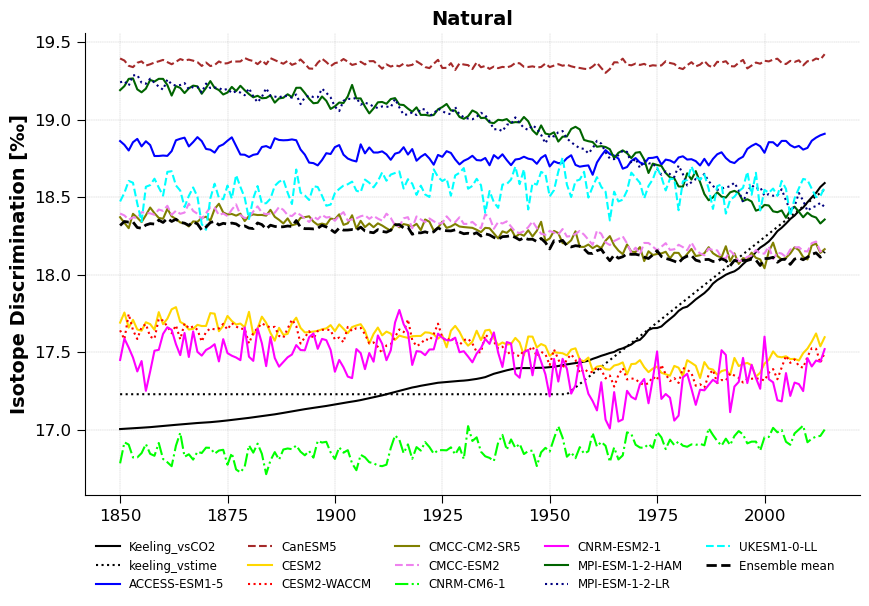

In [29]:
# Plot Total Delta
# Extract columns 2 to 15 (excluding the 'Year' column)
y = nDelta.iloc[:, 2:15]
mean = nDelta['models_mean']
years = nDelta['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Natural', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_with_cncm.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


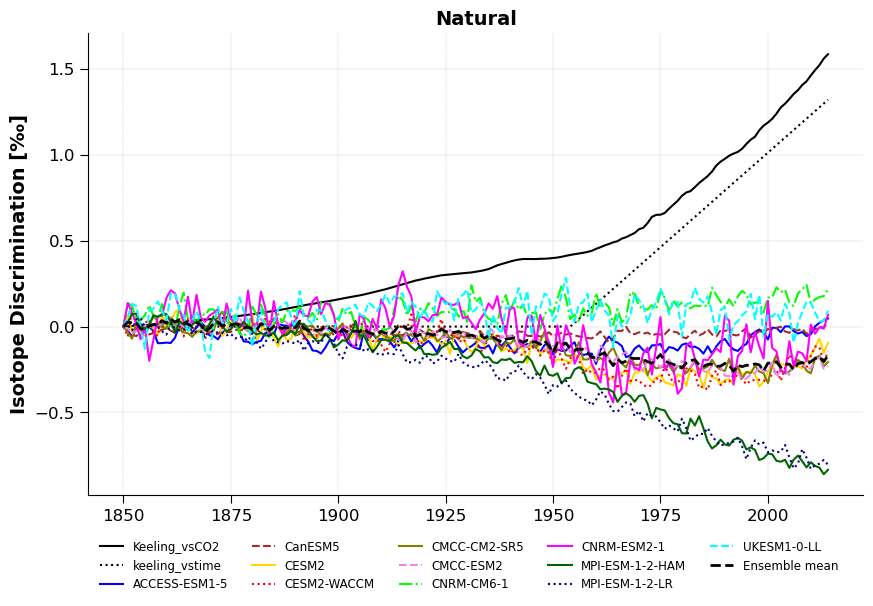

In [32]:
# Plot Total Delta
# Extract columns 2 to 12 (excluding the 'Year' column)
y = dfN.iloc[:, 2:15]
mean = dfN['models_mean']
years = dfN['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Natural', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_Change.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


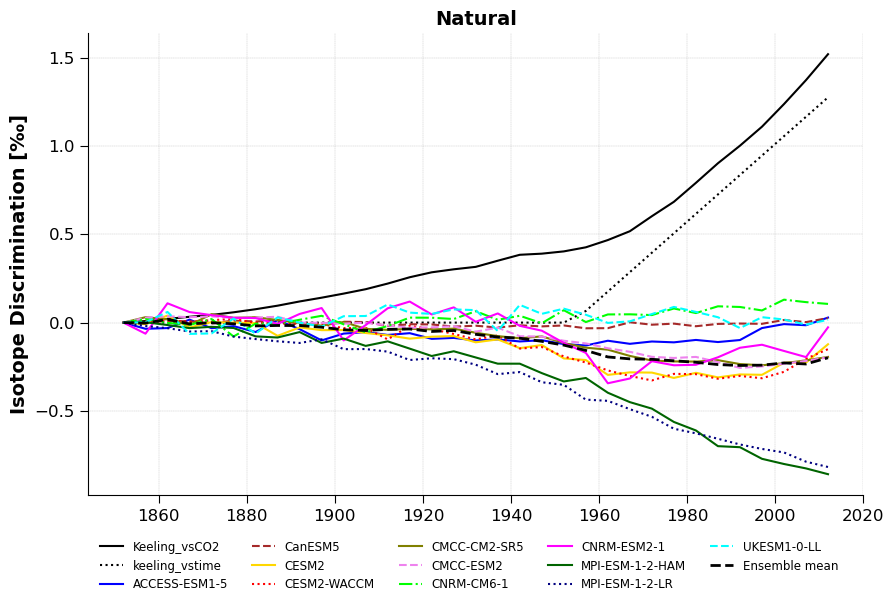

In [5]:
# Plot Total Delta
# Extract columns 2 to 12 (excluding the 'Year' column)
y = dfN2.iloc[:, 2:15]
mean = dfN2['models_mean']
years = dfN2['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Natural', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_Change_5yearsMean.png', 
           # dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


# Crop Delta

In [6]:
# Calculate the change in crop Discrimination
dfC = cDelta.copy()
# Subtract the values of the first row from all rows in the last 11 columns
dfC.iloc[:, -14:] = dfC.iloc[:, -14:] - dfC.iloc[0, -14:]

# Mean of 5 rows for the Natural vegetation
dfC1 = cDelta.groupby(np.arange(len(cDelta))//5).mean()

#Make a variable for time with 5 years interval
years5 = np.arange(1850, 2015, 5)

# Calculate the change in Natural Vegetation Discrimination
dfC2 = dfC1.copy()
# Subtract the values of the first row from all rows in the last 11 columns
dfC2.iloc[:, -14:] = dfC2.iloc[:, -14:] - dfC2.iloc[0, -14:]

In [35]:
cDelta.tail(2)

,Unnamed: 0,Years,Keeling_vsCO2,keeling_vstime,ACCESS-ESM1-5,CanESM5,CESM2,CESM2-WACCM,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-ESM2-1,MPI-ESM-1-2-HAM,MPI-ESM-1-2-LR,UKESM1-0-LL,models_mean
163,163,2013,0.0,0.0,0.240173,-0.397107,-0.113708,-0.110225,0.344526,0.326575,-0.021718,-0.025410,0.045800,0.162217,-0.697277,-0.059551
164,164,2014,0.0,0.0,0.243574,-0.411649,-0.120102,-0.116864,0.332586,0.323596,-0.014872,-0.038208,0.061407,0.175890,-0.700348,-0.062994


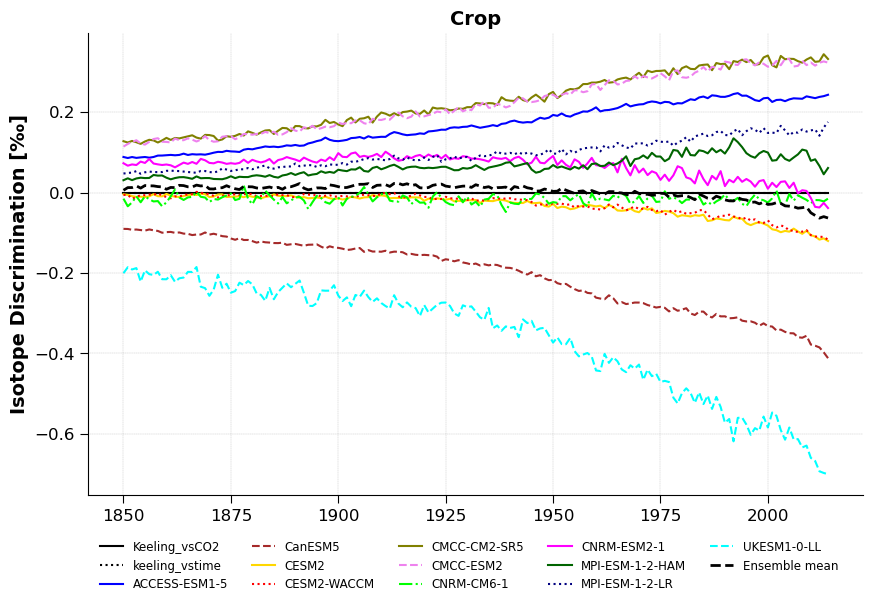

In [34]:
# Plot Total Delta
# Extract columns 2 to 15 (excluding the 'Year' column)
y = cDelta.iloc[:, 2:15]
mean = cDelta['models_mean']
years = cDelta['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Crop', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Crop_isotope_discrimination_with_cncm.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


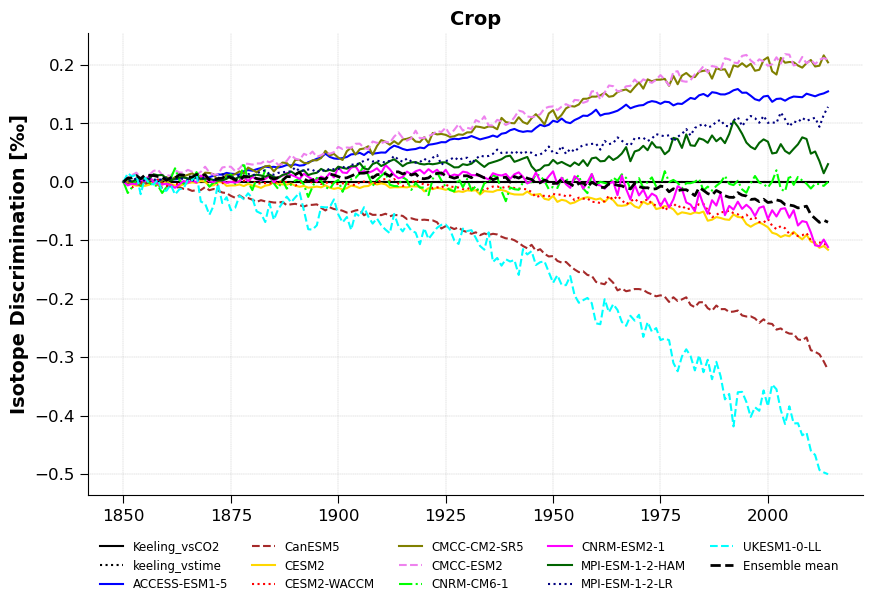

In [16]:
# Plot Total Delta
# Extract columns 2 to 14 (excluding the 'Year' column)
y = dfC.iloc[:, 2:15]
mean = dfC['models_mean']
years = dfC['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Crop', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Crop_isotope_discrimination_Change.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


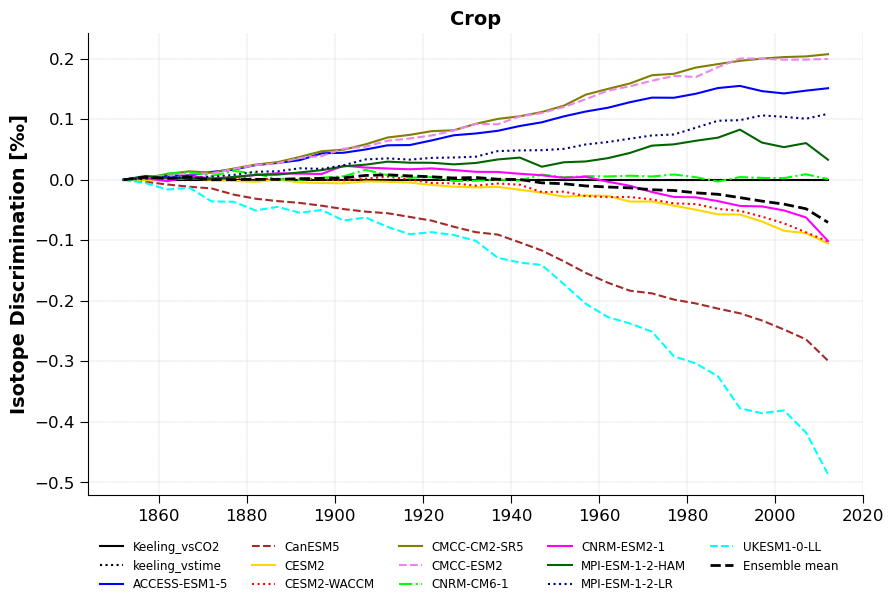

In [7]:
# Plot Total Delta
# Extract columns 2 to 12 (excluding the 'Year' column)
y = dfC2.iloc[:, 2:15]
mean = dfC2['models_mean']
years = dfC2['Years']

# Define plotting parameters
labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Isotope Discrimination [‰]', size=14, weight = 'bold')
ax.set_title('Crop', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('Total_isotope_discrimination_Change_5yearsMean.png', 
           # dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


## Make the plot for delta

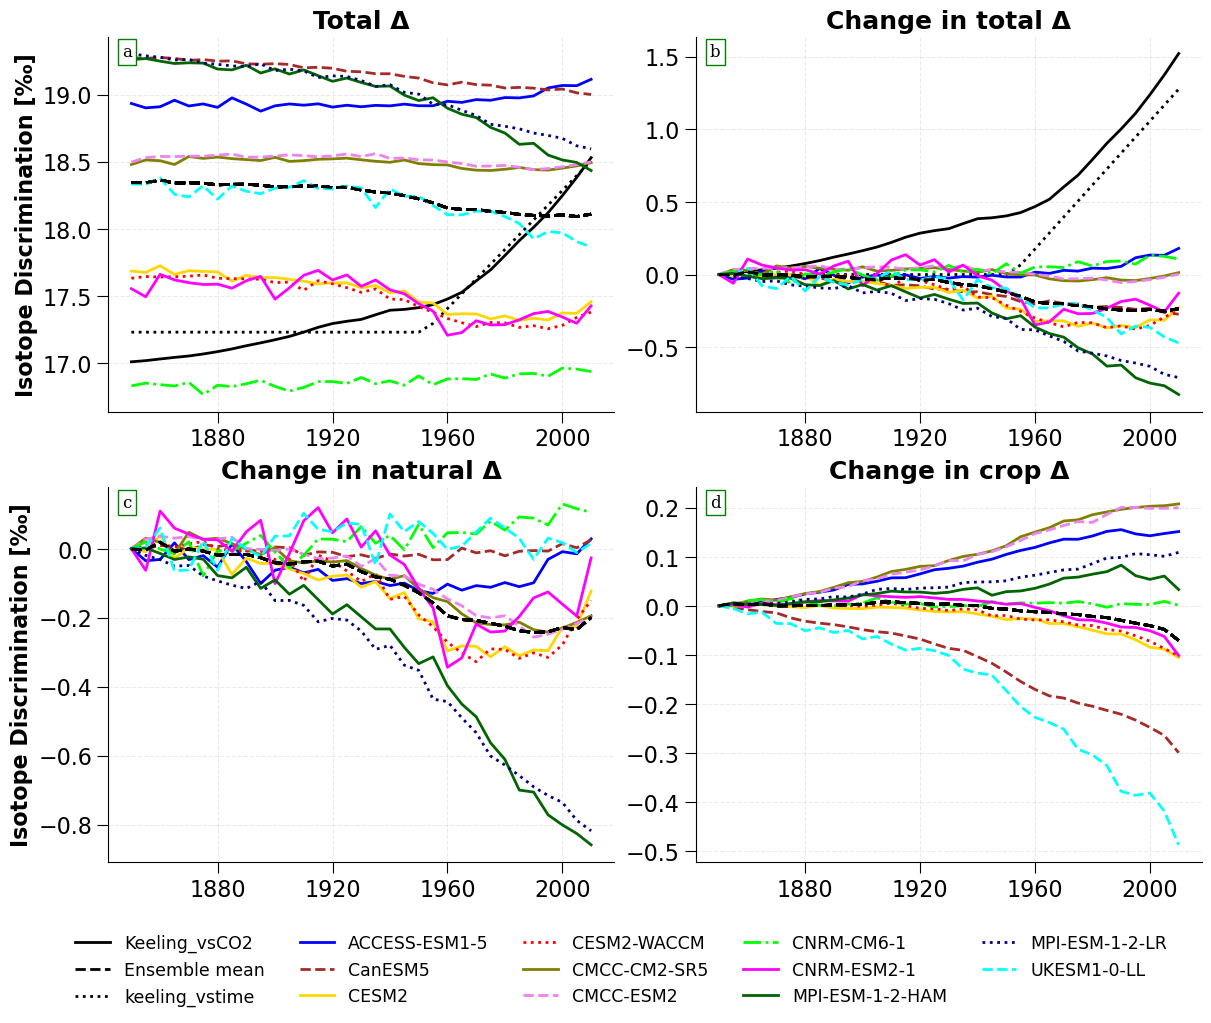

In [18]:

fig, axs = plt.subplot_mosaic([['a', 'b'], ['c', 'd']],
                               figsize=(12,9), layout="constrained")


labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']

#Plot the Total

y = dfT1.iloc[:, 2:15]
mean = dfT1['model_mean']
years = np.arange(1850, 2015, 5)

for i in range(y.shape[1]):
    axs['a'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['a'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')   
    axs['a'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['a'].yaxis.grid(True, linestyle='--', alpha=0.25)
    #axs['a'].set_visible(False)
    axs['a'].set_title('Total Δ', fontsize = 18, weight = 'bold')
    axs['a'].set_ylabel('Isotope Discrimination [‰]', fontsize = 16, weight = 'bold')
    axs['a'].spines['right'].set_visible(False)
    axs['a'].spines['top'].set_visible(False)
    #axs['a'].spines['left'].set_visible(False)
    axs['a'].tick_params(axis = 'both', labelsize=16, size=8)
    axs['a'].xaxis.set_major_locator(MaxNLocator(nbins=5))
    

#Plot the Total

y = dfT2.iloc[:, 2:15]
mean = dfT2['model_mean']
years = np.arange(1850, 2015, 5)

for i in range(y.shape[1]):
    axs['b'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['b'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')   
    axs['b'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['b'].yaxis.grid(True, linestyle='--', alpha=0.25)
    #axs['b'].set_ylim(-0.9, 1.5) # Set y-axis limits for the subplot
    #axs['b'].set_visible(False)
    axs['b'].set_title('Change in total Δ', fontsize = 18, weight = 'bold')
   #axs['b'].set_ylabel('Isotope Discrimination [‰]', fontsize = 14, 
                        #weight = 'bold')
    axs['b'].spines['right'].set_visible(False)
    axs['b'].spines['top'].set_visible(False)
    #axs['b'].spines['left'].set_visible(False)
    axs['b'].tick_params(axis = 'both', labelsize=16, size=8)
    axs['b'].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
# Plot the first natural
y = dfN2.iloc[:, 4:15]
mean = dfN2['models_mean']
#Make a variable for time with 5 years interval
years = np.arange(1850, 2015, 5)


# Define plotting parameters
# years = tot_delta1['Years']
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']

    
for i in range(y.shape[1]):
    axs['c'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['c'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')
    
    axs['c'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['c'].yaxis.grid(True, linestyle='--', alpha=0.25)
    
    #axs['c'].set_ylim(-0.9, 1.5) # Set y-axis limits for the subplot
    #axs['c'].set_visible(False)
    axs['c'].set_title('Change in natural Δ', fontsize = 18, weight = 'bold')
    axs['c'].set_ylabel('Isotope Discrimination [‰]', fontsize = 16, weight = 'bold')
    axs['c'].spines['right'].set_visible(False)
    axs['c'].spines['top'].set_visible(False)
    #axs['c'].spines['left'].set_visible(False)
    axs['c'].tick_params(axis = 'both', labelsize=16, size=8)
    #axs['c'].set_xticks([])
    axs['c'].xaxis.set_major_locator(MaxNLocator(nbins=5))
      
    
# Plot the crop
y = dfC2.iloc[:, 4:15]
mean = dfC2['models_mean']
years = np.arange(1850, 2015, 5)

    
for i in range(y.shape[1]):
    axs['d'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['d'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')
    axs['d'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['d'].yaxis.grid(True, linestyle='--', alpha=0.25)
    
    # Set y-axis limits for the subplot
    #axs['d'].set_ylim(-0.9, 1.5)

    #axs['d'].set_visible(False)
    axs['d'].set_title('Change in crop Δ', fontsize = 18, weight = 'bold')

    axs['d'].spines['right'].set_visible(False)
    axs['d'].spines['top'].set_visible(False)
    #axs['d'].spines['left'].set_visible(False)
    axs['d'].tick_params(axis = 'both', labelsize=16, size=8)
    #axs['d'].set_xticks([])
    axs['d'].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
#Make the legend
# Combine handles and labels from the relevant axes
handles, labels = [], []
for ax_key in ['a', 'b', 'c', 'd']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'b'
fig.legend(handles, labels, fontsize=12.5, loc='upper left', ncol=5,
           bbox_to_anchor=(0.0450, 0.3, 0.5, -0.315), frameon=False)


# Assuming axs is a dictionary mapping labels to axes objects
for label, ax in axs.items():
    # Label physical distance in and down
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='green', pad=3.0))    
# Save the plot
#plt.savefig('Delta_11models_5yearsMean_NatCropchangeNolimit_composite_250506.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


#plt.show()

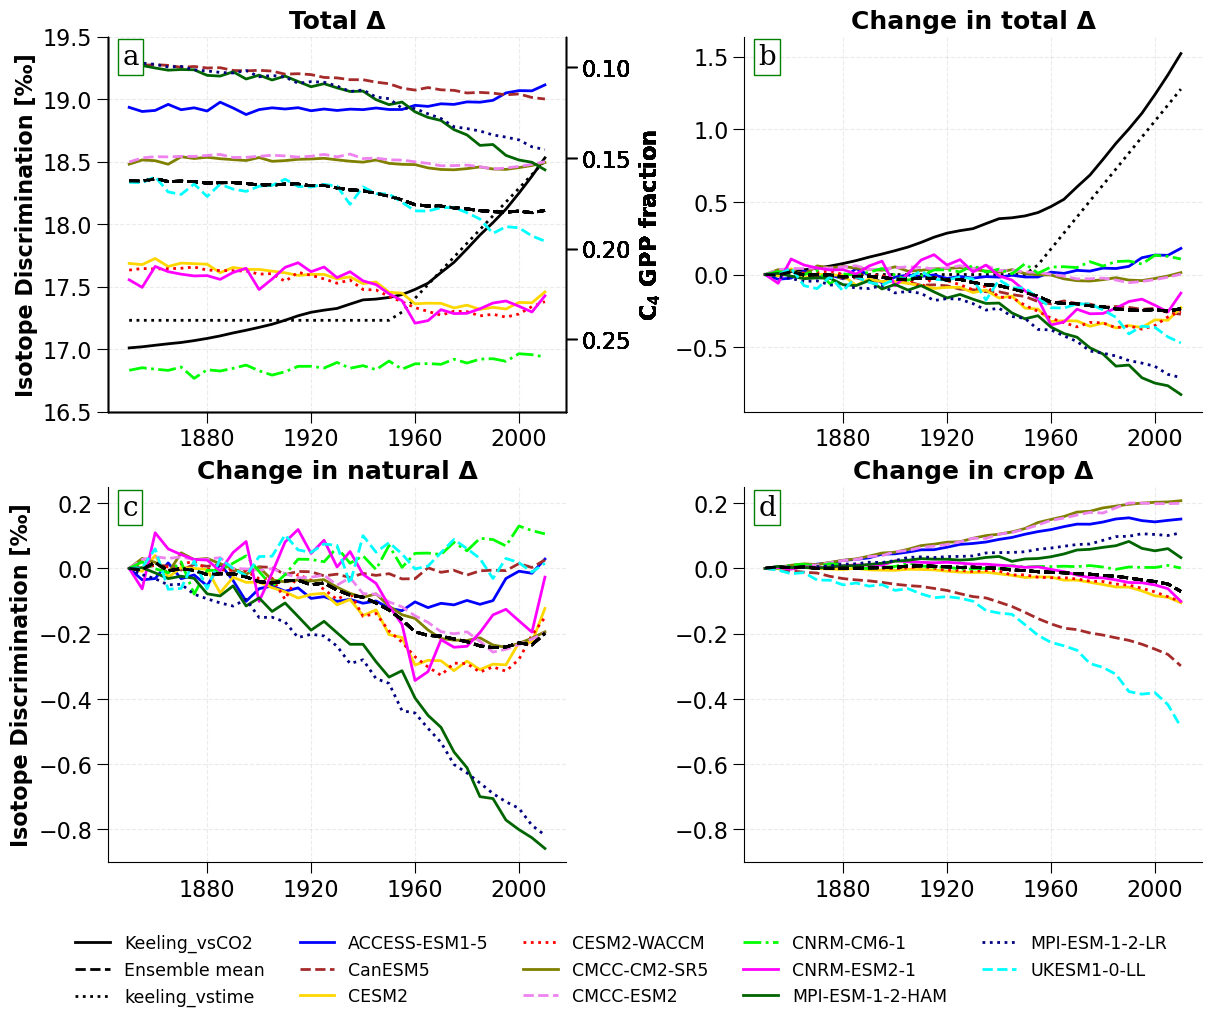

In [22]:
import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment


fig, axs = plt.subplot_mosaic([['a', 'b'], ['c', 'd']],
                               figsize=(12,9), layout="constrained")


labels=['Keeling_vsCO2', 'keeling_vstime','ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', ':', '-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['black', 'black', 'blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']

#Plot the Total

y = dfT1.iloc[:, 2:15]
mean = dfT1['model_mean']
years = np.arange(1850, 2015, 5)
xC4_values = (dfT1['Keeling_vsCO2'] - 20.7) / (-20.7 + 6.3)

# Mean of 5 rows for the total vegetation
#xC4_values = xC4.groupby(np.arange(len(xC4))//5).mean()


for i in range(y.shape[1]):
    axs['a'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['a'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')
    # Create a secondary y-axis
    ax2 = axs['a'].twinx()
    
    #Plot the C4 GPP fraction with full transparency using apha = 0. It won't show
    ax2.plot(years, xC4_values, alpha = 0)
    ax2.set_ylim(0.083, 0.29)
    #ax2.set_xlim(1850, 2014)
    ax2.invert_yaxis()
    
    #ax2.set_ylim(0.27, 0.15)  # Note: This will invert the y-axis
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(True)
    ax2.tick_params(axis='y', labelsize=16, size=8)
    ax2.set_ylabel('C$_{4}$ GPP fraction', fontsize=16, weight='bold')


    axs['a'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['a'].yaxis.grid(True, linestyle='--', alpha=0.25)
    axs['a'].set_ylim(16.5, 19.5) # Set y-axis limits for the subplot
    #axs['a'].set_visible(False)
    axs['a'].set_title('Total Δ', fontsize = 18, weight = 'bold')
    axs['a'].set_ylabel('Isotope Discrimination [‰]', fontsize = 16, weight = 'bold')
    axs['a'].spines['right'].set_visible(False)
    axs['a'].spines['top'].set_visible(False)
    #axs['a'].spines['left'].set_visible(False)
    axs['a'].tick_params(axis = 'both', labelsize=16, size=8)
    axs['a'].xaxis.set_major_locator(MaxNLocator(nbins=5))
    

#Plot the Total

y = dfT2.iloc[:, 2:15]
mean = dfT2['model_mean']
years = np.arange(1850, 2015, 5)

for i in range(y.shape[1]):
    axs['b'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['b'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')   
    axs['b'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['b'].yaxis.grid(True, linestyle='--', alpha=0.25)
    #axs['b'].set_ylim(-0.9, 1.5) # Set y-axis limits for the subplot
    #axs['b'].set_visible(False)
    axs['b'].set_title('Change in total Δ', fontsize = 18, weight = 'bold')
   #axs['b'].set_ylabel('Isotope Discrimination [‰]', fontsize = 14, 
                        #weight = 'bold')
    axs['b'].spines['right'].set_visible(False)
    axs['b'].spines['top'].set_visible(False)
    #axs['b'].spines['left'].set_visible(False)
    axs['b'].tick_params(axis = 'both', labelsize=16, size=8)
    axs['b'].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
# Plot the first natural
y = dfN2.iloc[:, 4:15]
mean = dfN2['models_mean']
#Make a variable for time with 5 years interval
years = np.arange(1850, 2015, 5)


# Define plotting parameters
# years = tot_delta1['Years']
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']

    
for i in range(y.shape[1]):
    axs['c'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['c'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')
    
    axs['c'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['c'].yaxis.grid(True, linestyle='--', alpha=0.25)
    
    axs['c'].set_ylim(-0.9, 0.25) # Set y-axis limits for the subplot
    #axs['c'].set_visible(False)
    axs['c'].set_title('Change in natural Δ', fontsize = 18, weight = 'bold')
    axs['c'].set_ylabel('Isotope Discrimination [‰]', fontsize = 16, weight = 'bold')
    axs['c'].spines['right'].set_visible(False)
    axs['c'].spines['top'].set_visible(False)
    #axs['c'].spines['left'].set_visible(False)
    axs['c'].tick_params(axis = 'both', labelsize=16, size=8)
    #axs['c'].set_xticks([])
    axs['c'].xaxis.set_major_locator(MaxNLocator(nbins=5))
      
    
# Plot the crop
y = dfC2.iloc[:, 4:15]
mean = dfC2['models_mean']
years = np.arange(1850, 2015, 5)

    
for i in range(y.shape[1]):
    axs['d'].plot(years, y.iloc[:, i], linewidth=2, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
    axs['d'].plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')
    axs['d'].xaxis.grid(True, linestyle='--', alpha=0.25)
    axs['d'].yaxis.grid(True, linestyle='--', alpha=0.25)
    
    # Set y-axis limits for the subplot
    axs['d'].set_ylim(-0.9, 0.25)

    #axs['d'].set_visible(False)
    axs['d'].set_title('Change in crop Δ', fontsize = 18, weight = 'bold')

    axs['d'].spines['right'].set_visible(False)
    axs['d'].spines['top'].set_visible(False)
    #axs['d'].spines['left'].set_visible(False)
    axs['d'].tick_params(axis = 'both', labelsize=16, size=8)
    #axs['d'].set_xticks([])
    axs['d'].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
#Make the legend
# Combine handles and labels from the relevant axes
handles, labels = [], []
for ax_key in ['a', 'b', 'c', 'd']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'b'
fig.legend(handles, labels, fontsize=12.5, loc='upper left', ncol=5,
           bbox_to_anchor=(0.0450, 0.3, 0.5, -0.315), frameon=False)


# Assuming axs is a dictionary mapping labels to axes objects
for label, ax in axs.items():
    # Label physical distance in and down
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=20, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='green', pad=3.0))    

    # Save the plot
plt.savefig('Delta_11models_5yearsMean_composite_2Yaxes_250716.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


#plt.show()